In [1]:
# ===== Include all needed libraries / packages =====


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ===== Create list of frequencies & dataframes from csv files =====


# Specify the directory where the CSV files are
directory = './csv_data/'

# Specify a list of all CSV filenames in the directory
csv_files = [
        '4-panneaux-R1-R2-R3-R4.csv',
        'panneau-R1.csv',
        'panneau-R2.csv',
        'panneau-R3.csv',
        'panneau-R4.csv',
    ]

# Create a list of DataFrames
list_of_dfs = [pd.read_csv(os.path.join(directory, f)) for f in csv_files]


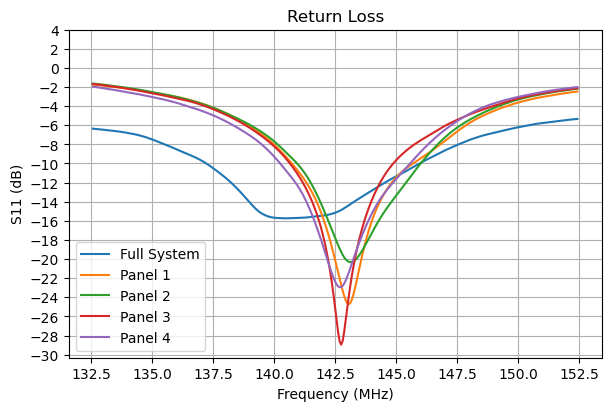

In [3]:
# ===== Plot data =====

min_plot_freq = (142.5 - 10)
max_plot_freq = (142.5 + 10)
step_plot_freq = 2.5

%matplotlib inline

list_plot_legends = [
    'Full System',
    'Panel 1',
    'Panel 2',
    'Panel 3',
    'Panel 4',
]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), layout='constrained')

for index, df in enumerate(list_of_dfs):
    filtered_df = df[df['Freq'].between(min_plot_freq * 1e6, max_plot_freq * 1e6, inclusive="neither")]
    
    list_freq = filtered_df['Freq'].values.flatten()
    list_freq = list_freq / 1e6
    list_s11_mag = filtered_df['S11_MAG'].values.flatten()
    
    ax.plot(list_freq, list_s11_mag, label=list_plot_legends[index])    

ax.set_xticks(np.arange(min_plot_freq, max_plot_freq + step_plot_freq, step_plot_freq))
ax.set_yticks(np.arange(-30, 6, 2))
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('S11 (dB)')
ax.set_title("Return Loss")
ax.grid(True)
ax.legend()

plt.savefig(("output_plot/return_loss.pdf"), format='pdf', dpi=600)

plt.show()